<h1><font size=12>
Deep Learning y Redes Neuronales</h1>
<h1>E06 - Tensorflow and Keras<br></h1>

Developed by [Jesus Solano](http://www.jesussolanogomez.com/) <br> 
Version 8.3, 11 Julio 2018 


In [1]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

[[ 0.55356914 -0.37596172]
 [ 0.98105873 -0.28467913]
 [ 1.87345298  0.43682194]
 ...
 [ 0.04851258  0.90561169]
 [ 0.43233063 -0.45949733]
 [ 1.73748601 -0.11214153]]


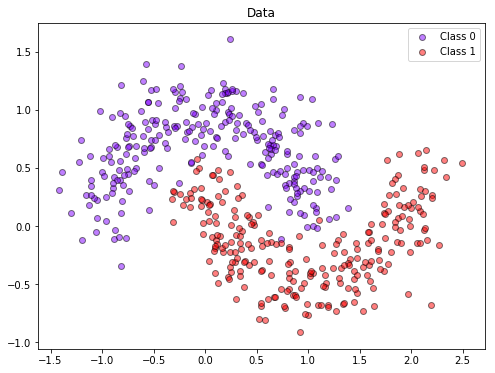

In [2]:
numberSamples=1000
div=numberSamples/2

X, Y = make_moons(n_samples=numberSamples, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

print(X)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

In [3]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML

In [4]:
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def


In [8]:
graph = tf.Graph()
with graph.as_default():
    
    inputClasses = 2
    outputClasses = 1
    
    x = tf.placeholder(tf.float32,shape=[None,inputClasses])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    h1_Neurons = 3
    
    with tf.name_scope('inference') as scope:
 
        w_h1 = tf.Variable(tf.random_normal([h1_Neurons,inputClasses]),dtype=tf.float32,name='weightsH')
        b_h1 = tf.Variable(tf.random_normal([h1_Neurons,1]),dtype=tf.float32,name='biasH')
        
        hidden1 = tf.sigmoid(tf.matmul(w_h1,tf.transpose(x)) + b_h1)
        
        w_pred = tf.Variable(tf.random_normal([outputClasses,h1_Neurons]),dtype=tf.float32,name='weights')
        b_pred = tf.Variable(0,dtype=tf.float32,name='bias')
        
        y_pred = tf.matmul(w_pred, hidden1) + b_pred
        
        print(tf.shape(y_pred))

    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss)
  
    with tf.name_scope('train') as scope:
        learning_rate = 2.0
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)

    init = tf.global_variables_initializer()

show_graph(graph.as_graph_def())

Tensor("inference/Shape:0", shape=(2,), dtype=int32)


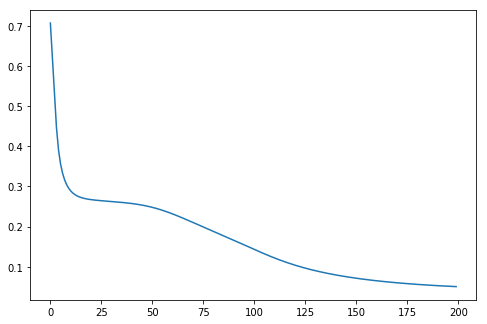

In [9]:
num_epochs = 1000
losses = []

with graph.as_default():
    sess = tf.Session()
    sess.run(init)      
    for step in range(num_epochs):
        sess.run(train,{x: x_train, y_true: y_train})
        if (step % 5 == 0):
            losses.append(sess.run(loss, {x: x_train, y_true: y_train}))
                       
pl.figure(figsize = (8,16/3))
pl.plot(losses)

[[10.266768  9.840737 -9.755486]]


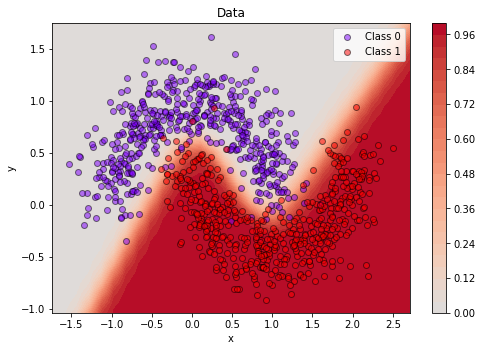

In [10]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

with graph.as_default():
    wval = sess.run(w_pred)
    print(wval)
    result = sess.run(y_pred, {x:np.array([[1,2]])})
    
    def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return sigmoid(sess.run(y_pred,{x: xval}))

pl.figure(figsize = (8,16/3))  

plot_decision_region(X, pred_fun)

plot_data(X, Y)

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


In [66]:
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

maxWords = 1000

print('Loading data...')

# Load reuters data.
(xTrain, yTrain), (xTest, yTest) = reuters.load_data(num_words=max_words,
                                                         test_split=0.3)
print('The number of train sequences are: ',len(xTrain))
print('The number of test  sequences are: ',len(xTest))

numClasses = np.max(yTrain) + 1
print('The number of classes are: ',numClasses)


Loading data...
The number of train sequences are:  7859
The number of test  sequences are:  3369
The number of classes are:  46


In [67]:
# Recover indices to map each word.
wordIndex = reuters.get_word_index(path="reuters_word_index.json")
numWords = max(wordIndex.values()) + 1
words = ['']*numWords
for word in wordIndex:
    words[wordIndex[word]] = word
    
# Print an example of the sequence.    
print([words[i-2] for i in xTrain[20][1:]])

['mine', 's', 'net', 'adjusted', '40', '', 'lt', 'manufacturing', 'in', '', 'officials', 'of', '', '', 'share', 'point', 'mln', 'mining', 'its', 'an', '', '', '', 'all', 'of', 's', 'net', 'stake', '', 'sources', '', '26', '', 'in', '29', '', '', 'to', 's', 'net', 'adjusted', 'federal', 'estimated', 'of', 'might', 'coffee', 'able', '', 'and', 'all', '', '', '85', 'yesterday', 'over', '', '', 'in', '', 'sources', 'ec', '', 'in', '', '', '', 'money', '', 'able', 'stake', 'bid', 'higher', '', '', '', '', 'that', 'mine', 'mln', 'february', 'to', 'adjusted', '40', '', 'said', 'as', '', 'in', '', 'of', '', 'said', 'acquisition', 'mln', 'final', '5', 'in', '', '', 'in', 'with', '', 'vs', 'of', '', 'agreed', 'and', 'of', '', 'estimated', 'able', 'same', 'bid', 'higher', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'a', '', '', '', '', 'market', 'after', '', 'officials', 'of', 'share', 'point', 'mln', '', 'in', '', '', 'corn', 'a', '', 'is', 'make', 'central', 'of', '', '', 'a

In [68]:
# Token each sample in a vector which contains 1 entry when the sentence has the word..
tokenizer = Tokenizer(num_words=maxWords)
xTrain = tokenizer.sequences_to_matrix(xTrain, mode='binary')
xTest = tokenizer.sequences_to_matrix(xTest, mode='binary')

print('xTrain shape:', xTrain.shape)
print('xTest shape:', xTest.shape)

xTrain shape: (7859, 1000)
xTest shape: (3369, 1000)


In [69]:
# One-hot encoding for y labels.
yTrain = keras.utils.to_categorical(yTrain, numClasses)
yTest = keras.utils.to_categorical(yTest, numClasses)

print('yTrain shape:', yTrain.shape)
print('yTest shape:', yTest.shape)

yTrain shape: (7859, 46)
yTest shape: (3369, 46)


### Base Model

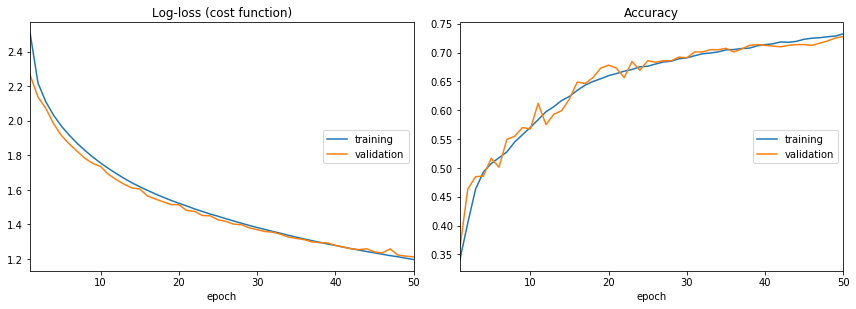



______________________________


Testing new samples...
3369/3369 [==============================] - 0s 95us/step

Test score: 1.306851524243761
Test accuracy: 0.7129712080824584


In [85]:
import keras.optimizers as opts
from livelossplot import PlotLossesKeras
# Create the neural network.

print('\n ---------------- Base Model ------------------ \n ')

nn = Sequential()
nn.add(Dense(256, input_shape=(max_words,)))
nn.add(Activation('sigmoid'))
nn.add(Dense(numClasses))
nn.add(Activation('softmax'))
nn.summary(70)

# Compile model.
nn.compile(loss='categorical_crossentropy',
              optimizer=opts.SGD(),
              metrics=['accuracy'])

# Train model.
batch_size = 32
epochs = 50

history = nn.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[PlotLossesKeras()])

print('\n\n______________________________\n\n')

# Calculates accuracy score.
print('Testing new samples...')
score = nn.evaluate(xTest, yTest)
model0=score[1]
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

### Model 1

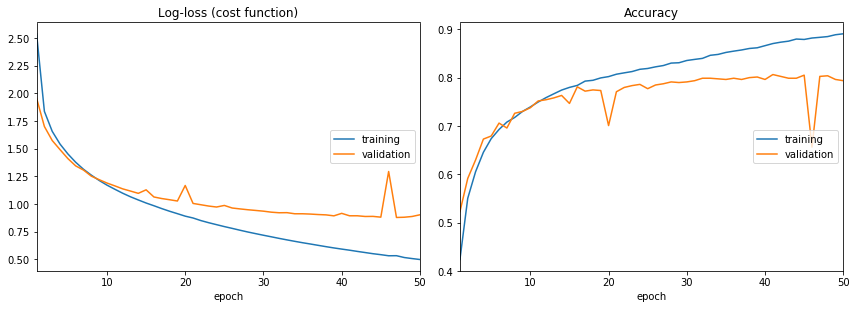



______________________________


Testing new samples...
3369/3369 [==============================] - 0s 141us/step

Test score: 1.0051827098113841
Test accuracy: 0.7571979816057591


In [86]:
import keras.optimizers as opts
from livelossplot import PlotLossesKeras
# Create the neural network.

print('\n ---------------- Model 1 ------------------ \n ')

nn = Sequential()
nn.add(Dense(256, input_shape=(max_words,)))
nn.add(Activation('relu'))
nn.add(Dense(numClasses))
nn.add(Activation('softmax'))
nn.summary(70)

# Compile model.
nn.compile(loss='categorical_crossentropy',
              optimizer=opts.SGD(),
              metrics=['accuracy'])

# Train model.
batch_size = 32
epochs = 50

history = nn.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[PlotLossesKeras()])

print('\n\n______________________________\n\n')

# Calculates accuracy score.
print('Testing new samples...')
score = nn.evaluate(xTest, yTest)
model1=score[1]
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

### Model 2

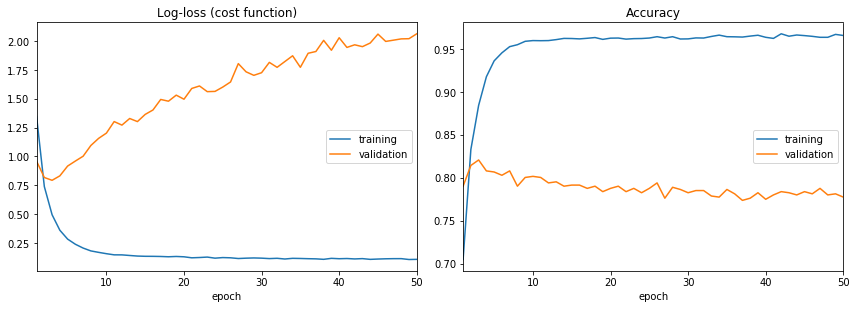



______________________________


Testing new samples...
3369/3369 [==============================] - 0s 147us/step

Test score: 2.169603199235549
Test accuracy: 0.7571979816322972


In [87]:
import keras.optimizers as opts
from livelossplot import PlotLossesKeras
# Create the neural network.

print('\n ---------------- Model 2 ------------------ \n ')

nn = Sequential()
nn.add(Dense(256, input_shape=(max_words,)))
nn.add(Activation('relu'))
nn.add(Dense(numClasses))
nn.add(Activation('softmax'))
nn.summary(70)

# Compile model.
nn.compile(loss='categorical_crossentropy',
              optimizer=opts.RMSprop(),
              metrics=['accuracy'])

# Train model.
batch_size = 32
epochs = 50

history = nn.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[PlotLossesKeras()])

print('\n\n______________________________\n\n')

# Calculates accuracy score.
print('Testing new samples...')
score = nn.evaluate(xTest, yTest)
model2=score[1]
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

### Model 3

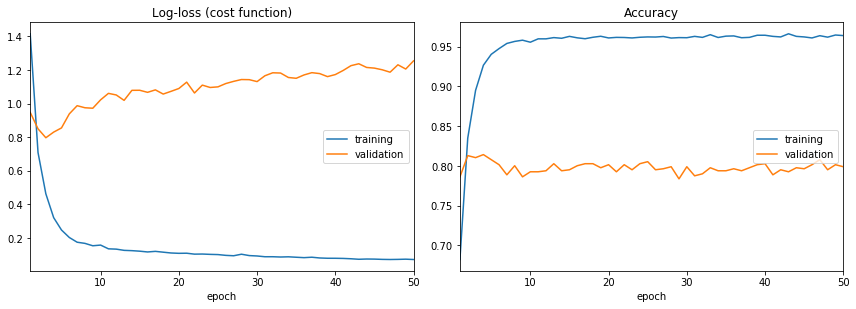



______________________________


Testing new samples...
3369/3369 [==============================] - 0s 144us/step

Test score: 1.4006032176596646
Test accuracy: 0.7770851885539978


In [88]:
import keras.optimizers as opts
# Create the neural network.

print('\n ---------------- Model 3 ------------------ \n ')

nn = Sequential()
nn.add(Dense(256, input_shape=(max_words,)))
nn.add(Activation('relu'))
nn.add(Dense(numClasses))
nn.add(Activation('softmax'))
nn.summary(70)

# Compile model.
nn.compile(loss='categorical_crossentropy',
              optimizer=opts.adam(),
              metrics=['accuracy'])

# Train model.
batch_size = 32
epochs = 50

history = nn.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[PlotLossesKeras()])

print('\n\n______________________________\n\n')

# Calculates accuracy score.
print('Testing new samples...')
score = nn.evaluate(xTest, yTest)
model3=score[1]
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

### Model 4

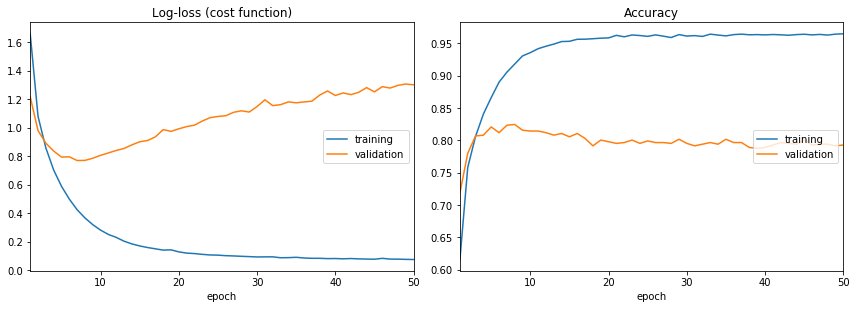



______________________________


Testing new samples...
3369/3369 [==============================] - 0s 105us/step

Test score: 1.3762067396090907
Test accuracy: 0.7658058771679471


In [89]:
import keras.optimizers as opts
# Create the neural network.

print('\n ---------------- Model 4 ------------------ \n ')

nn = Sequential()
nn.add(Dense(256, input_shape=(max_words,)))
nn.add(Activation('sigmoid'))
nn.add(Dense(numClasses))
nn.add(Activation('softmax'))
nn.summary(70)

# Compile model.
nn.compile(loss='categorical_crossentropy',
              optimizer=opts.adam(),
              metrics=['accuracy'])

# Train model.
batch_size = 32
epochs = 50

history = nn.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[PlotLossesKeras()])

print('\n\n______________________________\n\n')

# Calculates accuracy score.
print('Testing new samples...')
score = nn.evaluate(xTest, yTest)
model4=score[1]
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

### Model 5

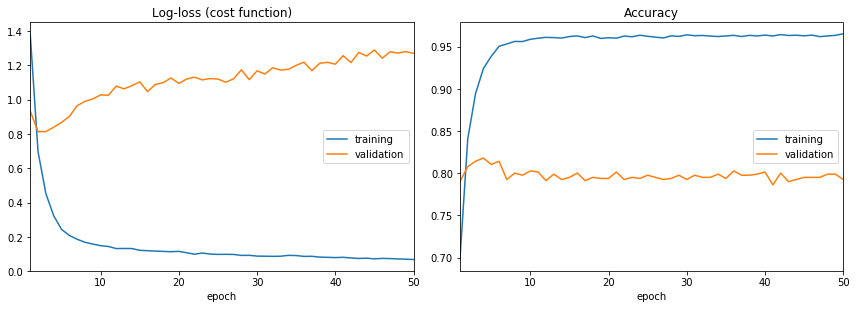



______________________________


Testing new samples...
3369/3369 [==============================] - 1s 172us/step

Test score: 1.384831189118496
Test accuracy: 0.7782724844698171


In [90]:
import keras.optimizers as opts
# Create the neural network.

print('\n ---------------- Model 5 ------------------ \n ')

nn = Sequential()
nn.add(Dense(256, input_shape=(max_words,),
                kernel_initializer='random_uniform',
                bias_initializer='zeros'))

nn.add(Activation('relu'))
nn.add(Dense(numClasses))
nn.add(Activation('softmax'))
nn.summary(70)

# Compile model.
nn.compile(loss='categorical_crossentropy',
              optimizer=opts.adam(),
              metrics=['accuracy'])

# Train model.
batch_size = 32
epochs = 50

history = nn.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[PlotLossesKeras()])

print('\n\n______________________________\n\n')

# Calculates accuracy score.
print('Testing new samples...')
score = nn.evaluate(xTest, yTest)
model5=score[1]
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

### Model 6

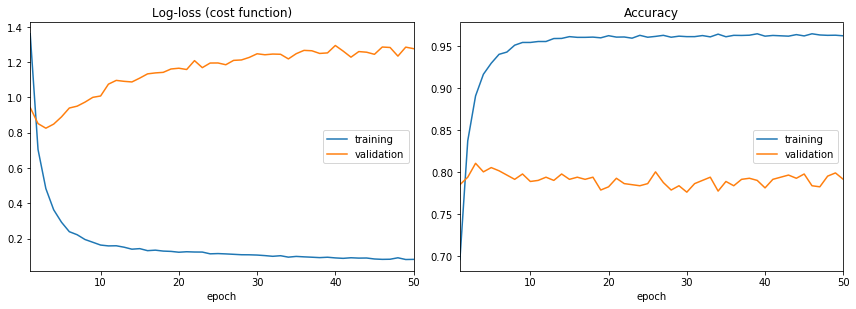



______________________________


Testing new samples...
3369/3369 [==============================] - 0s 116us/step

Test score: 1.3786846679196085
Test accuracy: 0.7758978926204864


In [91]:
import keras.optimizers as opts
# Create the neural network.

print('\n ---------------- Model 6 ------------------ \n ')

nn = Sequential()
nn.add(Dense(256, input_shape=(max_words,),
                kernel_initializer='random_normal',
                bias_initializer='ones'))

nn.add(Activation('relu'))
nn.add(Dense(numClasses))
nn.add(Activation('softmax'))
nn.summary(70)

# Compile model.
nn.compile(loss='categorical_crossentropy',
              optimizer=opts.adam(),
              metrics=['accuracy'])

# Train model.
batch_size = 32
epochs = 50

history = nn.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1,
                    callbacks=[PlotLossesKeras()])

print('\n\n______________________________\n\n')

# Calculates accuracy score.
print('Testing new samples...')
score = nn.evaluate(xTest, yTest)
model6=score[1]
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

 # Final Remarks

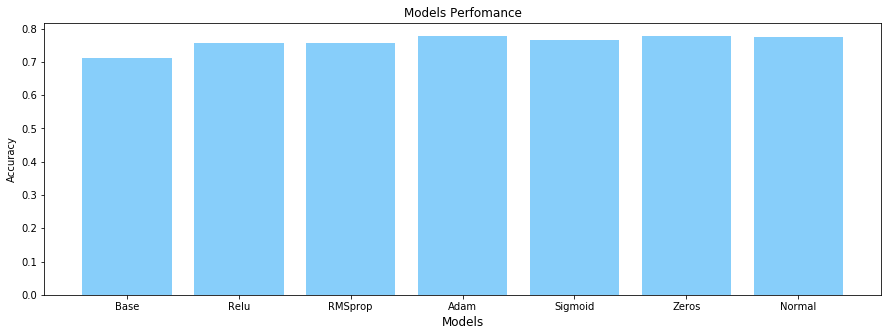

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.bar(['Base','Relu','RMSprop','Adam','Sigmoid','Zeros','Normal'],[model0,model1,model2,model3,model4,model5,model6],color="lightskyblue",align='center')
plt.title("Models Perfomance")
plt.xlabel("Models",fontsize=12)
plt.ylabel('Accuracy')
plt.show()

As you can see different variations over the training parameters does not change significatiliy the accuracy results. Moreover the mean accuracy is above 75 % for all variations. Nevertheless you have to take into account that neural networks are fully sensible to training dataset then above results are not equal for all datasets. 